In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing data
data = pd.read_csv(r'C:\Users\turan\Desktop\Kaggle\TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 122.8+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data = data.set_index('Date')

<AxesSubplot:xlabel='Date'>

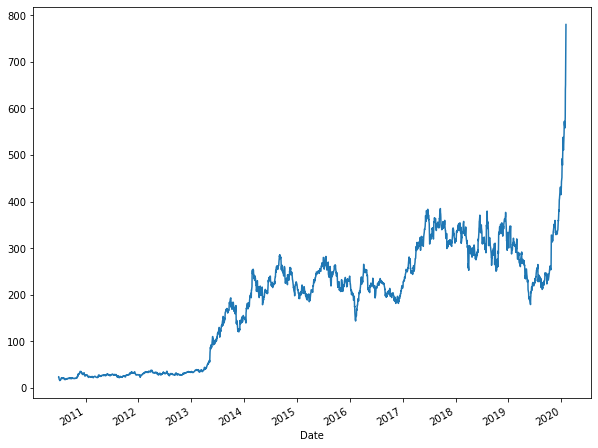

In [7]:
plt.figure(figsize=(10,8))
data['Close'].plot()

In [8]:
#Difference between next price and current price

In [9]:
data['PriceDiff'] = data['Close'].shift(-1) - data['Close']

In [10]:
#Rate of return on current price

In [11]:
data['Return'] = data['PriceDiff'] / data['Close']

In [12]:
data['ma50'] = data['Close'].rolling(50).mean()

First time using Moving average, a little description for beginners

In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM). or rolling mean and is a type of finite impulse response filter. Variations include: simple, cumulative, or weighted forms (described below). Highly used for financial analyses.

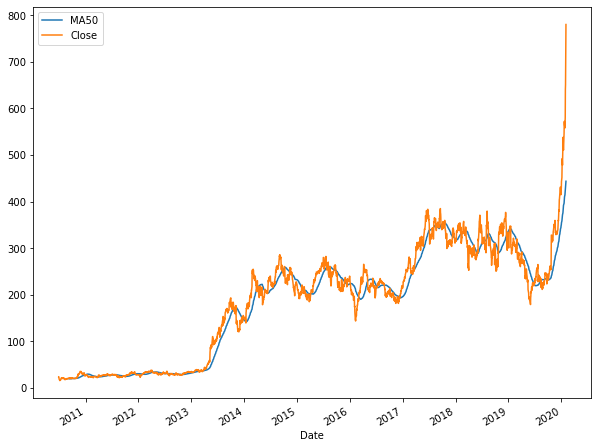

In [13]:
plt.figure(figsize=(10, 8))
data['ma50'].plot(label='MA50')
data['Close'].plot(label='Close')
plt.legend()
plt.show()


The above is a ten years chart of Tesla Stock with simple moving averages. The blue line is the shorter, 50-day moving average. Most traders will use the cross of the short-term moving average above the longer-term moving average to initiate a long position and identify the start of a bullish trend. As we can see there is a growing trend.

In [20]:
data['MA10'] = data['Close'].rolling(10).mean()
data = data.dropna()
data.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,ma50,MA10,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,,,
2010-09-21,20.889999,21.549999,20.670000,20.770000,20.770000,796000,-0.899999,-0.043332,20.1336,20.860,1,19.870001,-0.899999,-1.029999
2010-09-22,20.870001,20.950001,19.799999,19.870001,19.870001,962900,-0.310002,-0.015602,20.1682,20.757,1,19.559999,-0.310002,-1.340001
2010-09-23,19.889999,20.139999,19.500000,19.559999,19.559999,668100,0.540001,0.027607,20.1626,20.642,1,20.100000,0.540001,-0.800000
2010-09-24,19.950001,20.190001,19.650000,20.100000,20.100000,578900,0.430001,0.021393,20.1668,20.635,1,20.530001,0.430001,-0.369999
2010-09-27,20.400000,20.809999,20.049999,20.530001,20.530001,418600,0.869999,0.042377,20.1646,20.616,1,21.400000,0.869999,0.500000


In [21]:
data['Shares'] = [1 if data.loc[ei, 'MA10']>data.loc[ei, 'ma50'] else 0 for ei in data.index]

Calculating Profit

The profit is calculated as the close price of (tomorrow - the close price of today) Otherwise the profit is 0.

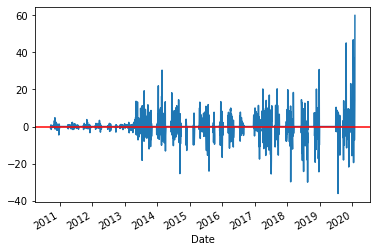

In [22]:
data['Close1'] = data['Close'].shift(-1)
data['Profit'] = [data.loc[ei, 'Close1'] - data.loc[ei, 'Close'] if data.loc[ei, 'Shares']==1 else 0 for ei in data.index]
data['Profit'].plot()
plt.axhline(y=0, color='red')

In [23]:
#What would happen if we keep our investment:

In [24]:
data['wealth'] = data['Profit'].cumsum()
data.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,ma50,MA10,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,,,
2010-09-21,20.889999,21.549999,20.670000,20.770000,20.770000,796000,-0.899999,-0.043332,20.1336,20.860,1,19.870001,-0.899999,-0.899999
2010-09-22,20.870001,20.950001,19.799999,19.870001,19.870001,962900,-0.310002,-0.015602,20.1682,20.757,1,19.559999,-0.310002,-1.210001
2010-09-23,19.889999,20.139999,19.500000,19.559999,19.559999,668100,0.540001,0.027607,20.1626,20.642,1,20.100000,0.540001,-0.670000
2010-09-24,19.950001,20.190001,19.650000,20.100000,20.100000,578900,0.430001,0.021393,20.1668,20.635,1,20.530001,0.430001,-0.239999
2010-09-27,20.400000,20.809999,20.049999,20.530001,20.530001,418600,0.869999,0.042377,20.1646,20.616,1,21.400000,0.869999,0.630000


Text(0.5, 1.0, 'Total money you have made: 519.6899819999999')

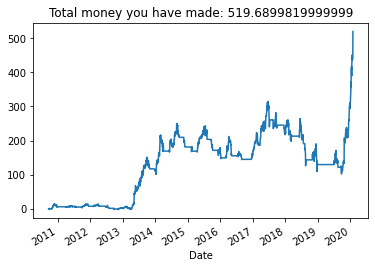

In [25]:
data['wealth'].plot()
plt.title('Total money you have made: {}'.format(data.loc[data.index[-2], 'wealth']))

As we can see our strategy gave as the possibility to made good money during all of these years

In [28]:
#Calculating the risk of price drop

data['LogReturn'] = np.log(data['Close']).shift(-1) - np.log(data['Close'])
print(data['LogReturn'].head())

Date
2010-09-21   -0.044299
2010-09-22   -0.015724
2010-09-23    0.027233
2010-09-24    0.021167
2010-09-27    0.041504
Name: LogReturn, dtype: float64


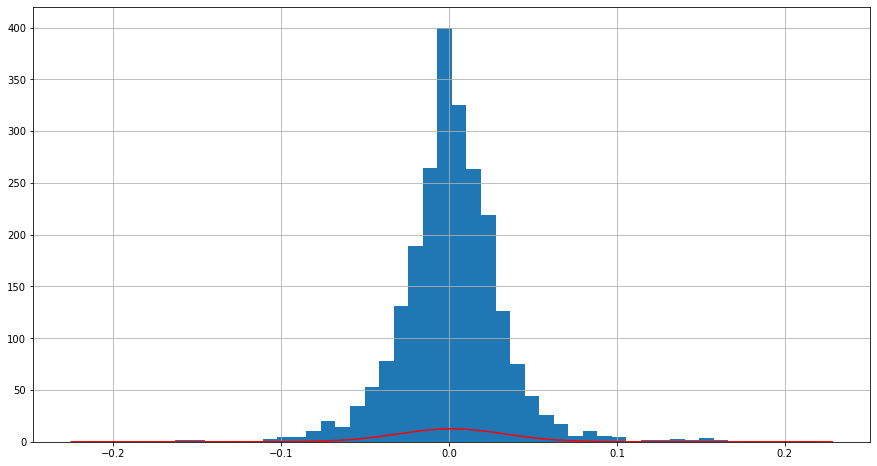

In [29]:
#Showing the histogram of log return of Tesla's stock

from scipy.stats import norm
mu = data['LogReturn'].mean()
sigma = data['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(data['LogReturn'].min()-0.01, data['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

data['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [30]:
#Calculating the probability of 10 percentage price drop in a day:

prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The probability of dropping over 10% in one day ', prob_return1)

The probability of dropping over 10% in one day  0.0007289161362659028


The probability of dropping over 10% in one day 0.0006816601499662236

In [31]:
#Calculating the probability of 25 percentage price drop over a year:

mu220 = 365*mu
sigma220 = (365**0.5) * sigma
drop20 = None
print('The probability of dropping over 25% over a year: ', drop20)

The probability of dropping over 25% over a year:  None


In [32]:
#Calculate Value at risk (VaR):

VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk is: ', VaR)

Single day value at risk is:  -0.05097337879341509


In [34]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))

# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.05097337879341509
95% quantile  0.05388567039436322


In [35]:
#Estimate the average stock return with 90% Confidence Interval:

data['logReturn'] = np.log(data['Close'].shift(-1)) - np.log(data['Close'])
sample_size = data['logReturn'].shape[0]
sample_mean = data['logReturn'].mean()
sample_std = data['logReturn'].std(ddof=1) / sample_size**0.5
# left and right quantile
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [36]:
print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (0.0003759853377315397, 0.0025363062632166103)


Our simple calculation and predictions show that is nearly impossible that a price would drop during a day over 10% or during a year over 25%. The amount of calculated value at risk and what we got from the confidence interval shows us that Tesla is a super safe investment. Of course it is only a simple prediction and analyse that can not be taken serious but I hop that this example can show others the path that begginers can start from.

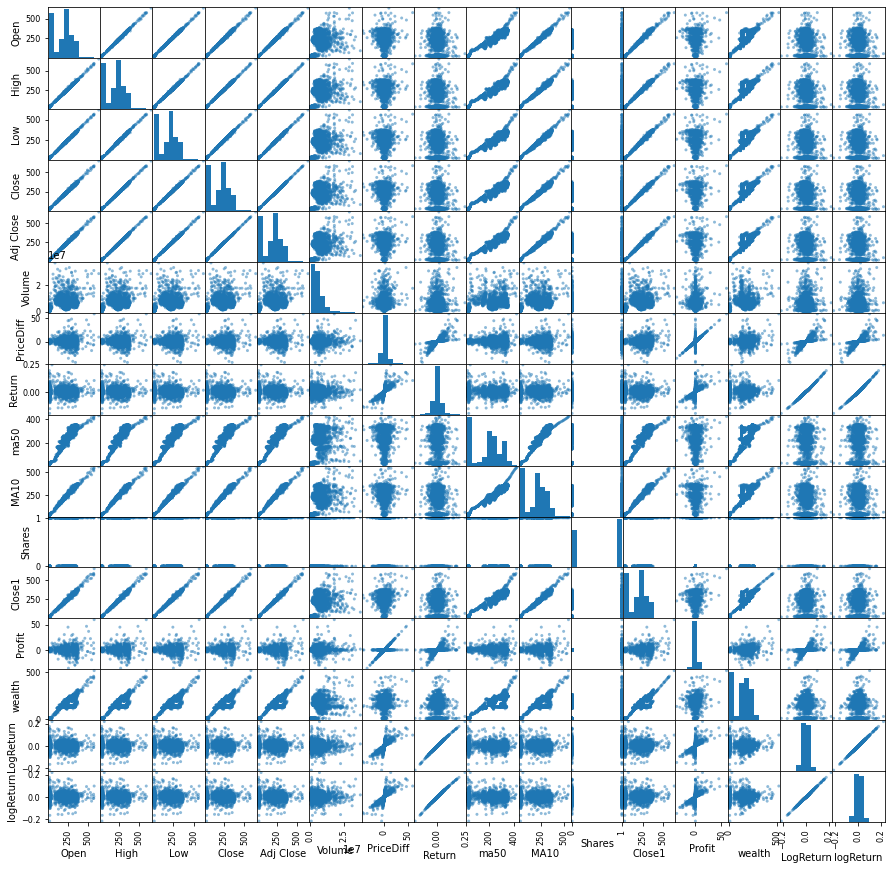

In [38]:
#Building our trading model

from pandas.plotting import scatter_matrix
sm = scatter_matrix(data, figsize=(15, 15))